# Q1

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from collections import Counter
import math
import seaborn as sns 
import pandas as pd
from Dists import Distribution
import warnings
warnings.filterwarnings('ignore')

**1)**

we create a function called "find_best" that first shuffles the candidates, then finds the maximum score( called max_delete) of the first k candidates and loops throught the remaining candidates to find the first score that is greater than max_delete. if the max_score is -1, the best candidate was among the first k and we have rejected it.

In [ ]:
def find_best(k,scores):
    n=len(scores)
    scores=random.sample(scores, n)
    scores_delete=scores[0:k]
    scores_check=scores[k:n]
    max_delete=np.max(scores_delete)
    max_score=-1
    for s_i in (scores_check):
        if s_i > max_delete:
             max_score=s_i
             break
    return max_score

fwe run the test 10000 times and count the number of trials that the selected sc
ore is also the best score

In [ ]:
def prob_best_k(n_t,k,scores):
    best_score=max(scores)
    list_selected_scores=[]
    for trial in range(n_t):
        max_trial=find_best(k,scores)
        list_selected_scores.append(max_trial)

    count_best_score=list_selected_scores.count(best_score)
    prob_best_score=count_best_score/n_t
    return prob_best_score


best k: 35
probability for the best k:  0.3702


Text(0, 0.5, 'p')

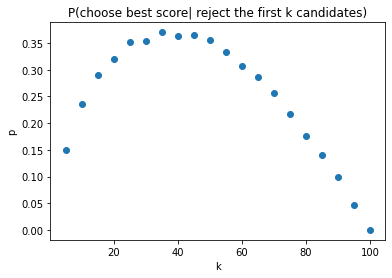

In [ ]:
n=100
n_t=10000
list_probs=[]
scores = list(range(n))
for k in range(5,101,5):
    p=prob_best_k(n_t,k,scores)
    list_probs.append(p)
k=np.arange(5,101,5)
print("best k: "+str(k[np.argmax(np.array(list_probs))]))
print("probability for the best k: ",max(list_probs))
plt.scatter(k,list_probs)
plt.title("P(choose best score| reject the first k candidates)")
plt.xlabel("k")
plt.ylabel("p")

**2)**

best number of candidates: 3
probability for the best n:  0.4992


Text(0, 0.5, 'p')

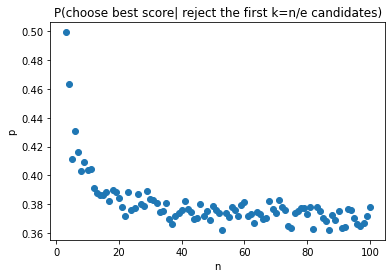

In [ ]:
n_t=10000
list_probs=[]
list_k=[]
for n in range(3,101):
    scores = list(range(n))
    k=math.floor(n/math.e)
    list_k.append(n/math.e)
    p=prob_best_k(n_t,k,scores)
    list_probs.append(p)

n=np.arange(3,101)
print("best number of candidates: "+str(n[np.argmax(np.array(list_probs))]))
print("probability for the best n: ",max(list_probs))
plt.scatter(n,list_probs)
plt.title("P(choose best score| reject the first k=n/e candidates)")
plt.xlabel("n")
plt.ylabel("p")

**Part B**

we define a function called "sample_dist" that for s times, samples n_s data points from the population and calculates the mean. 

In [ ]:
def sample_dist(population,s,n_s):
    list_mean=[]
    for i in range(s):
        sample=np.random.choice(population,n_s,replace=False)
        ave=np.mean(sample)
        list_mean.append(ave)
    return np.array(list_mean)


Text(0.5, 1.0, 'distribution of sample mean')

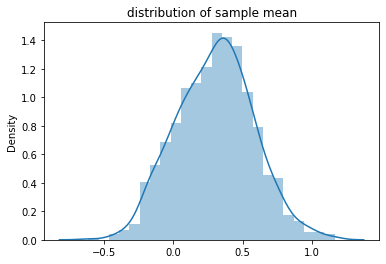

In [ ]:
stdNum=352
population=Distribution(stdNum)
n_s=100
s=1000
list_mean=sample_dist(population,s,n_s)
sns.distplot(list_mean)
plt.title("distribution of sample mean")

In [ ]:
df=pd.read_csv('/content/wine.csv')
df.head()

Class      1     2     3     4    5     6     7     8     9    10    11  \
0      1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04   
1      1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05   
2      1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03   
3      1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86   
4      1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04   

     12    13  
0  3.92  1065  
1  3.40  1050  
2  3.17  1185  
3  3.45  1480  
4  2.93   735

we plot the distribution of the population

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of population')

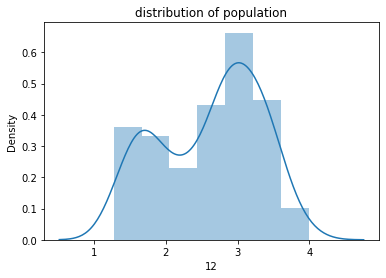

In [ ]:
population=df['12']
sns.distplot(population)
plt.title("distribution of population")

we can see that the distribution does is not normal

Text(0.5, 0.98, 'mean distribution for different sample size')

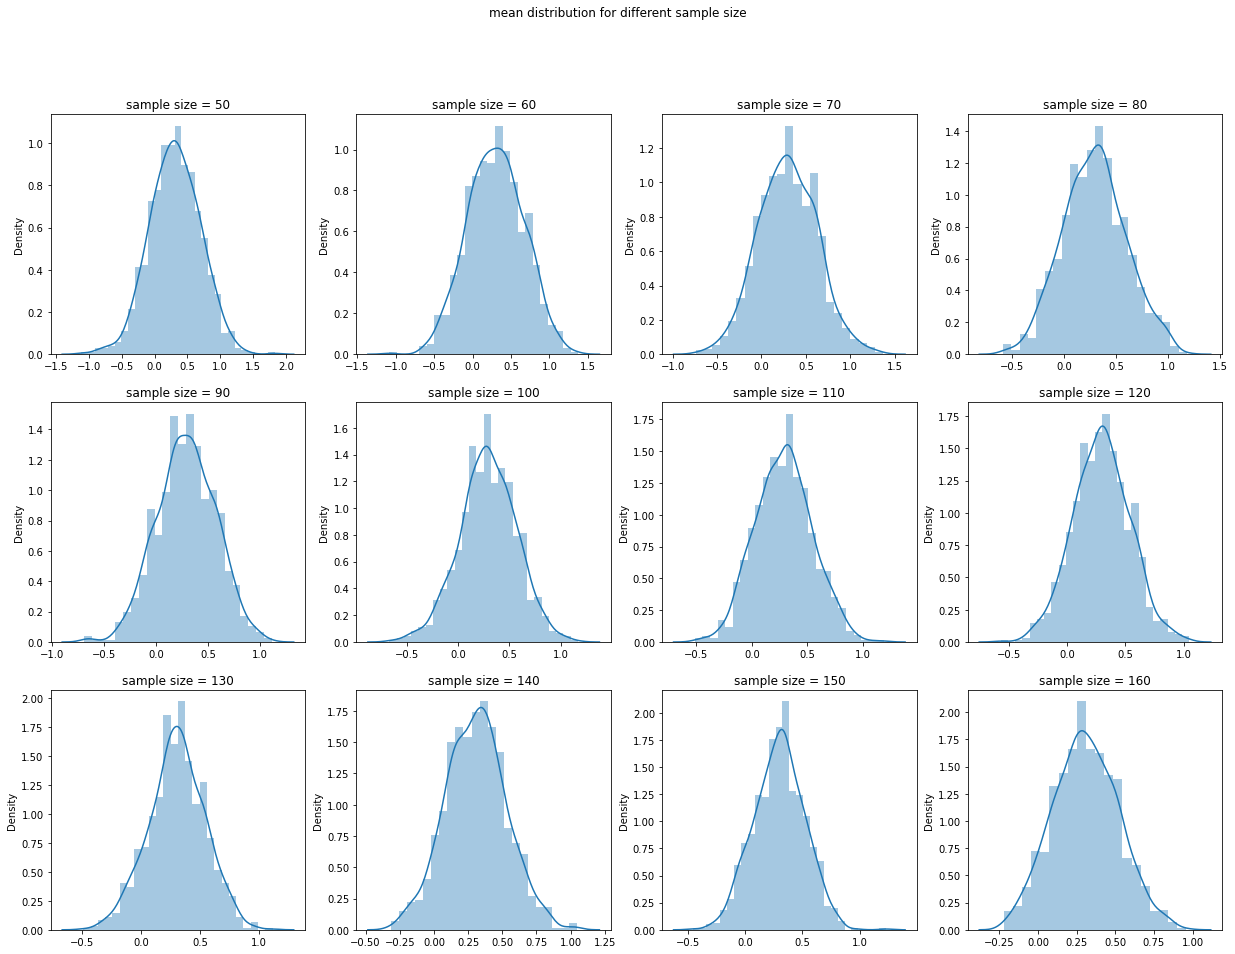

In [ ]:
sample_mean_list=[]
sample_std_list=[]
sample_clt_bound_list=[]
z_95=1.96
n_s_list=[50,60, 70, 80, 90, 100, 110, 120, 130, 140,150,160]
s=1000
figure=plt.figure(figsize=(21,15))
for (i,n_s) in enumerate(n_s_list):
    mean_dist=sample_dist(population,s,n_s)

    sample_mean=np.mean(mean_dist)
    sample_mean_list.append(sample_mean)

    sample_std=np.std(mean_dist)
    sample_std_list.append(sample_std)
    
    clt_lower=sample_std-((z_95*sample_std)/np.sqrt(n_s))
    clt_upper=sample_std+((z_95*sample_std)/np.sqrt(n_s))
    sample_clt_bound_list.append(("{:.4f}".format(clt_lower),"{:.4f}".format(clt_upper)))

    plt.subplot(3,4,i+1)
    sns.distplot(mean_dist)
    plt.title('sample size = '+ str(n_s_list[i]))
figure.suptitle('mean distribution for different sample size')


we can see as the sample size grows, the mean distribution becomes more like a normal distribution.

the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
df_result=pd.DataFrame({'sample size':n_s_list,
                       'sample dist mean':sample_mean_list,
                       'sample dist std':sample_std_list,
                       'sample 95% CI ':sample_clt_bound_list})
print("Population mean ","{:.4f}".format(np.mean(population)))
print("Population std ","{:.4f}".format(np.std(population)))
df_result

Population mean  0.2992
Population std  2.7341


sample size  sample dist mean  sample dist std    sample 95% CI 
0            50            0.3126           0.3865  (0.2793, 0.4936)
1            60            0.3011           0.3640  (0.2719, 0.4562)
2            70            0.2941           0.3311  (0.2535, 0.4086)
3            80            0.2944           0.3036  (0.2371, 0.3701)
4            90            0.2877           0.2823  (0.2240, 0.3406)
5           100            0.2900           0.2786  (0.2240, 0.3332)
6           110            0.2872           0.2553  (0.2076, 0.3030)
7           120            0.2957           0.2424  (0.1990, 0.2858)
8           130            0.3040           0.2397  (0.1985, 0.2809)
9           140            0.3078           0.2216  (0.1849, 0.2583)
10          150            0.2973           0.2217  (0.1862, 0.2572)
11          160            0.3081           0.2108  (0.1781, 0.2434)

we can see as the number of samples increases, the length of the confidence interval decreases.

$CI=z^* \pm \frac{s}{\sqrt{n}}$

s: sample standard deviation 

n: sample size

z:  confidence level
